<a href="https://colab.research.google.com/github/Masoomas98/DSPS_MSarfraz/blob/main/Homeworks/Homework5/HMW_5_FitLineToGRBAfterGlow_mcmc_DSOS23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting a line to GRB afterglow photometry

This exercise teaches you to fit the simplest model to data: a line, using different methods.

Notes:

    a line is a power law in log-log space. The GRB afterglow is generated by a powerlaw process
    
    we will learn later that a broken powerlaw is a prefer model for the GRB afterglow. But this exercise is about fitting lines: Linear Regression
    

# initial imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%pylab inline




Populating the interactive namespace from numpy and matplotlib


# Read in the input dataset
I am reading the data with Pandas. Pandas has excellent utilities for input-output of tabular data and also for time variables. We will use it throughout as our main package to acquire and manipulate data

In [2]:
grbAG = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/data/grb050525A.csv")
grbAG.head()

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0


In [3]:
grbAG.tail()
#   W1 and M2 are uv based satellite filter
# U and V are ground based filters
# mag here is log 10(no. of photons)
# how to treat the upperlimit to get uncertainty of magerr

,filter,time,mag,magerr,upperlimit
114,W1,63738,21.20,NaN,1
115,M2,74798,21.59,NaN,1
116,U,128928,20.05,NaN,1
117,V,971360,22.09,NaN,1
118,V,1171176,21.16,NaN,1


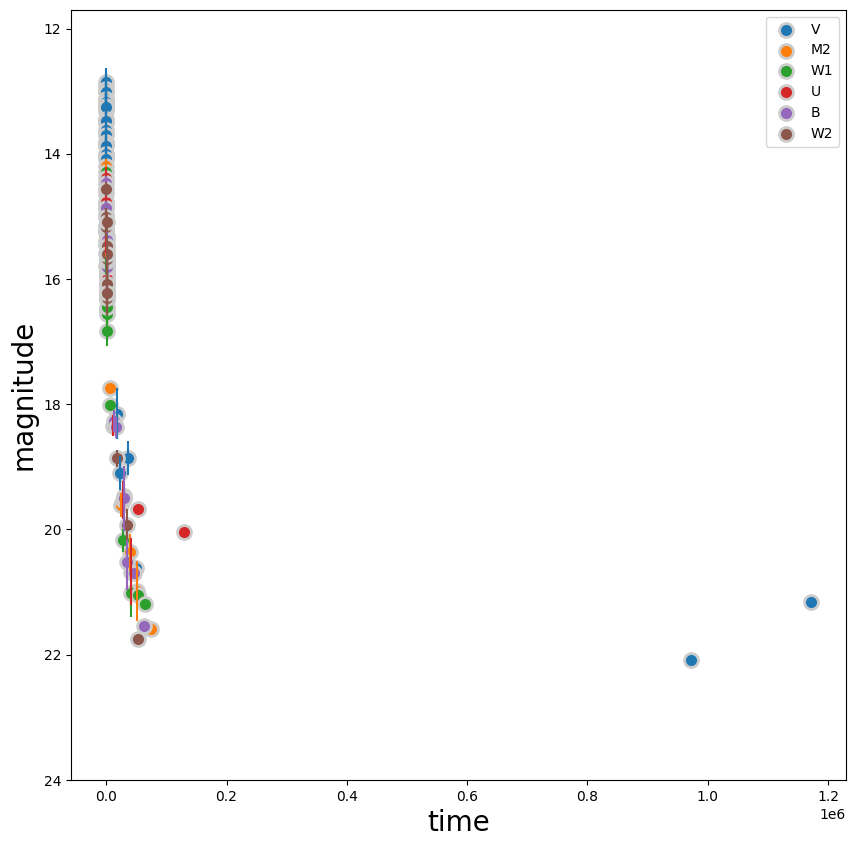

In [4]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique(): #set for unique filters
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "time"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "time"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].time,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("time", fontsize=20);

Figure no.1:
after glow of GRBs as they evolve overtime. This plot shows magnitude vs time for different filters , satellite , ground based.

# Create the log-time variable

We will fit a line in log space. That corresponds to fitting a powerlaw y=x^a in natural space.


In [5]:
import numpy as np
grbAG['logtime']= np.log10(grbAG['time'])
grbAG.head()

,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.21,0.24,0,1.819544
1,V,67,12.90,0.23,0,1.826075
2,V,68,12.86,0.23,0,1.832509
3,V,69,13.01,0.23,0,1.838849
4,V,70,12.97,0.23,0,1.845098


# Visualize the data
The data are photometric measurements: measurement of flux from an exploding star. The flux is measured in different photometric bands, i.e. within different wavelength range. You can think about this as a filter that would limit the light collected by a camera to a single color, e.g. red, blue, or green. In most all cameras (your phone camera for example) collect data in RGB bands saparately and combine them to create a "color picture". Our eyes also perceive color in 3 bands, R, G, B.

The information about the photometric band is stored in the variable ```grbAG.filter```. Plot the data with different colors for different photometric bands.

In [6]:
def plotlogtime(df, models=[]):
  #create a figure container and an axis object inside of it
  ax = pl.figure(figsize=(10,10)).add_subplot(111)

  #loop on every filter to plot - this will give differnt colors naturally.
  #Use pl.errorbar to plot the uncertainties

  for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

  # replot to add a better marker (optional)
  for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


  # plot the upperlimits as arrows
  nuplim = grbAG.mag.isna().sum()
  for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime,
             grbAG.loc[i].mag, 0, 0.5, head_width=0.1,
             overhang=1, shape="full",
             head_length=0.1, ec='#555555', visible=True)

  # I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
  pl.ylim(24,11.7)
  pl.legend()

  #Always rememebr you axis labels!!
  pl.ylabel("magnitude", fontsize=20)
  pl.xlabel("log time", fontsize=20)
  return ax

<Axes: xlabel='log time', ylabel='magnitude'>

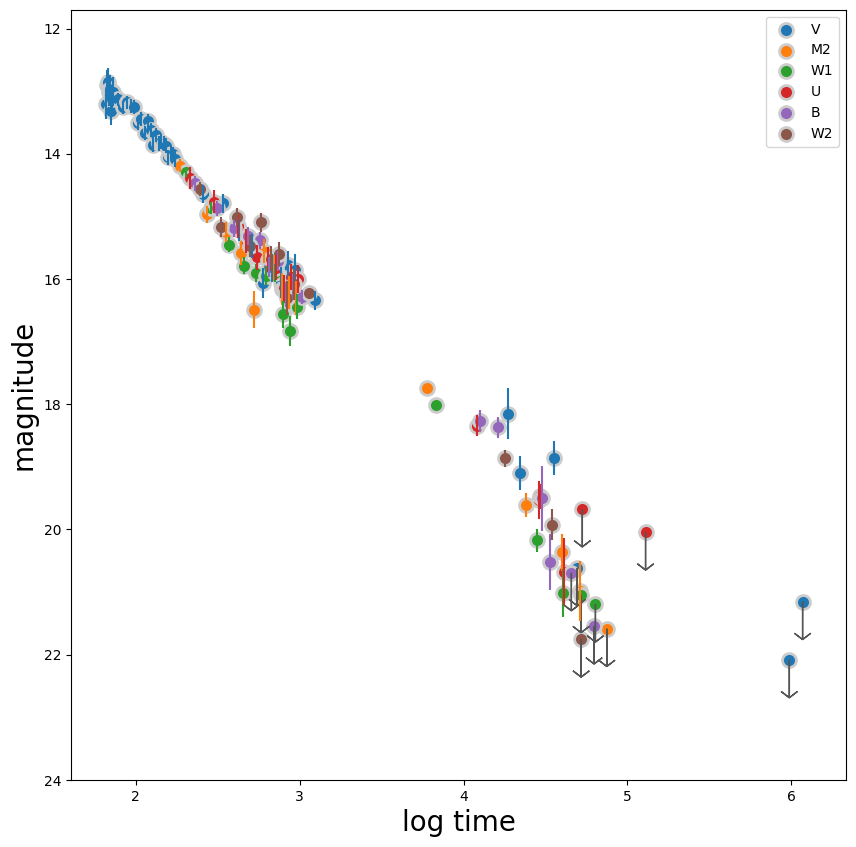

In [7]:
plotlogtime(grbAG)

Figure 2:
Plot of magnitude vs logtime to study the prompt and early afterglow emission

Figure 1: Photometry of the Afterglow of GRB 052505A. All photometry is from the Swift satellite and it is obtained from Table 3 of Blustin et al. 2005 https://arxiv.org/pdf/astro-ph/0507515.pdf. The photometric band for each datapoint is indicated in the legend. Time is relative from the estimated moment of explosion of the stellar progenitor. Upperlimits are indicated by down-pointing arrows.

In [8]:
grbAG_noupper = grbAG[grbAG.upperlimit==0]
grbAG_noupper.tail()

,filter,time,mag,magerr,upperlimit,logtime
103,V,35638,18.860000,0.27,0,4.551913
104,M2,39683,20.369034,0.30,0,4.598604
105,W1,40585,21.017147,0.39,0,4.608366
106,U,41040,20.674538,0.54,0,4.613207
109,M2,51257,20.989034,0.48,0,4.709753


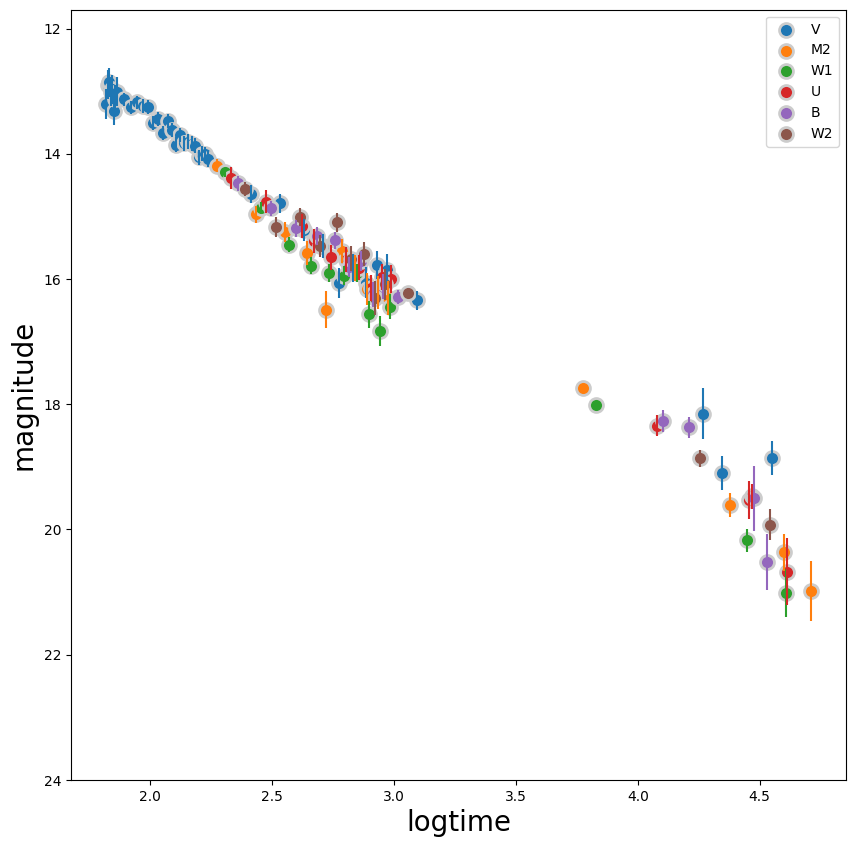

In [9]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG_noupper["filter"].unique(): #set for unique filters
    pl.errorbar(grbAG_noupper.loc[grbAG_noupper["filter"] == f, "logtime"],
                grbAG_noupper.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG_noupper.loc[grbAG_noupper["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG_noupper["filter"].unique():
    pl.scatter(grbAG_noupper.loc[grbAG_noupper["filter"] == f, "logtime"],
               grbAG_noupper.loc[grbAG_noupper["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG_noupper.mag.isna().sum()
for i in grbAG_noupper[grbAG_noupper.upperlimit == 1].index:
    pl.arrow(grbAG_noupper.loc[i].logtime,
             grbAG_noupper.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("logtime", fontsize=20);

Figure 3:
Same data plotted by dropping the missing data for magerr and dropping upperlimit =1


# Solve using the Normal Equation

It can be shown that the best linear fit to data is given by the equation:  

$(X^T \cdot X)^{-1} \cdot X^T \cdot \vec{y}$

The solution is a tuple of 2 parameters: sloper and intercept. Therefore the input has to be Nx2


In [10]:
x = grbAG[grbAG.upperlimit == 0].logtime.values
X = np.c_[np.ones((len(grbAG) - grbAG.upperlimit.sum(), 1)),
          x]


y = grbAG.loc[grbAG.upperlimit == 0].mag.values
print("shape of the input array X", X.shape)
print("shape of the input array y", y.shape)
#note the shape in python is flipped compared to the shape in linear algebra

shape of the input array X (108, 2)
shape of the input array y (108,)


In [11]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print ("best fit parameters from the Normal Equation: " +
       "intercept {:.2f}, slope {:.2f}".format(*theta_best))

best fit parameters from the Normal Equation: intercept 8.58, slope 2.51


# Fit a line to the data (excluding the upper limits) with sklearn LinearRegression

The exogenous (independent) variable is ```grbAG.logtime```.

The information about whether the point is an upper limit or a measurement is stored in the variable ```grbAG.upperlimit```.
To remove the upper limits you can "broadcast" the data: in pandas that looks like

```grbAG.loc[grbAG.upperlimit == 0]```



In [12]:
#note: imports should be moved to the top cell - follow PEP8 guidelines
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = np.c_[np.ones(len(x)), x]
lr.fit(X, y)
lr.coef_, lr.intercept_
#internal paramters of the model are called with an underscore

(array([0.        , 2.51199984]), 8.582668233648771)

In [13]:
print("The best fir parameter, linear slope is: ", lr.coef_[1], "and the intercept is:", lr.intercept_)

The best fir parameter, linear slope is:  2.511999838500421 and the intercept is: 8.582668233648771


# Fit a line to the data (excluding the upper limits) by minimizing an objective function

First, choose the L1 and L2 metric (see class notes) as the objective function.

Use ```scipy.optimize.minimize()``` to minimize it.


In [14]:
def line(intercept, slope, x):
    return intercept+ slope*x

In [15]:
from scipy.optimize import minimize # minimize the objective function
def line(x,slope,intercept):
  f = slope*x +intercept
  return f

def l1(args,x,y):
  '''
  L1 function: returns value of L1 for given arguments and data for a line model
  arg: slope and intercept
  x: independent variable (array)
  y: dependent variable (array)
  returns  L1 sum of difference between the absolute of prediction from the true data.
  '''
  slope, intercept = args
  return np.sum(np.absolute(y-line(x,slope,intercept)))



In [16]:
initial_guess = (10,1)
solution  = minimize(l1, initial_guess, args=(x, y))
slope, intercept = solution.x
print(solution)
print("best fit parameters from the minimization of L1: " +
       "slope {:.2f}, intercept {:.2f}".format(*solution.x))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 26.30434056218986
        x: [ 2.640e+00  8.227e+00]
      nit: 11
      jac: [-1.958e+00  0.000e+00]
 hess_inv: [[ 7.594e-03 -1.591e-02]
            [-1.591e-02  3.413e-02]]
     nfev: 172
     njev: 55
best fit parameters from the minimization of L1: slope 2.64, intercept 8.23


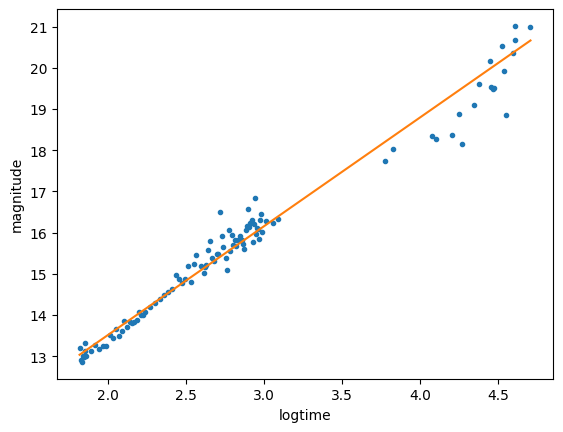

In [17]:
plot(x,y,".")
plt.plot(x,line(x,2.64,8.23))
pl.ylabel("magnitude")
pl.xlabel("logtime");

Figure 4: Applying L1 fit to the data to minimize the loss and optimize the parameters of the model.

In [18]:
def l2(args,x,y):
  '''
  L2 function: returns value of L2 for given arguments and data for a line model
  arg: slope and intercept
  x: independent variable (array)
  y: dependent variable (array)
  returns  L2 sum of difference between prediction and data squared
  '''
  slopel2, interceptl2 = args
  return np.sum((y-line(x,slopel2,interceptl2))**2)


In [19]:
initial_guess = (10,1)
solutionl2  = minimize(l2, initial_guess, args=(x, y))
slopel2, interceptl2 = solutionl2.x
print(solutionl2)
print("best fit parameters from the minimization of L2: " +
       "slope {:.2f}, intercept {:.2f}".format(*solutionl2.x))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 12.825987500725534
        x: [ 2.512e+00  8.583e+00]
      nit: 5
      jac: [-7.153e-07  1.192e-07]
 hess_inv: [[ 7.114e-03 -2.030e-02]
            [-2.030e-02  6.254e-02]]
     nfev: 21
     njev: 7
best fit parameters from the minimization of L2: slope 2.51, intercept 8.58


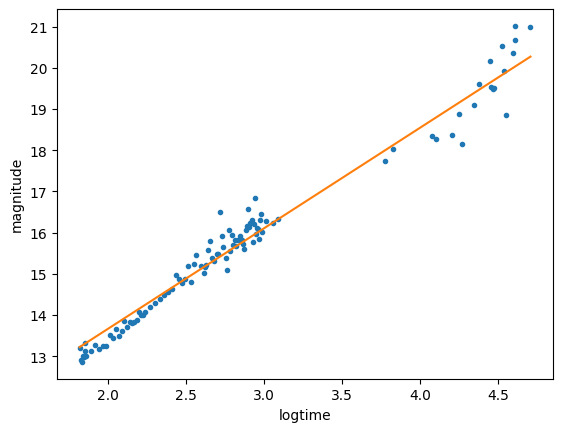

In [20]:
plot(x,y,".")
plt.plot(x,line(x,2.44,8.78))
pl.ylabel("magnitude")
pl.xlabel("logtime");

Figure 5: Applying L2 fit to the data to minimize the loss and optimize the parameters of the model.

# Fit a line to the data (excluding the upper limits) by minimizing an objective function that accounts for the measurements uncertainties

Since the data has uncertainty, choose the $\chi^2$ (chi squared) function as your objective function.

In [21]:
def chi2(args,x,y,s):
  '''
  chi squared function: returns value of chi squared for given arguments and data for a line model
  arg: slope and intercept
  x: independent variable (array)
  y: dependent variable (array)
  returns  chi squared sum of difference between the prediction from the true data divided by standard deviation.
  '''
  x = grbAG[grbAG.upperlimit == 0].logtime.values
  y = grbAG.loc[grbAG.upperlimit == 0].mag.values

  slope, intercept = args
  return np.sum(((y-line(x,slope,intercept))**2)/s**2)




In [22]:
initialGuess =(10,1)
s = grbAG.loc[grbAG.upperlimit == 0].magerr.values
chi2Solution = minimize(chi2, initialGuess, args=(x, y,s))
slopechi, interceptchi = chi2Solution.x

print(chi2Solution)
print("")
print("best fit parameters from the minimization of the chi squared: " +
       "slope {:.2f}, intercept {:.2f}".format(*chi2Solution.x))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 317.4206698013068
        x: [ 2.480e+00  8.599e+00]
      nit: 8
      jac: [ 4.578e-05  7.629e-06]
 hess_inv: [[ 2.261e-04 -4.675e-04]
            [-4.675e-04  9.762e-04]]
     nfev: 122
     njev: 37

best fit parameters from the minimization of the chi squared: slope 2.48, intercept 8.60


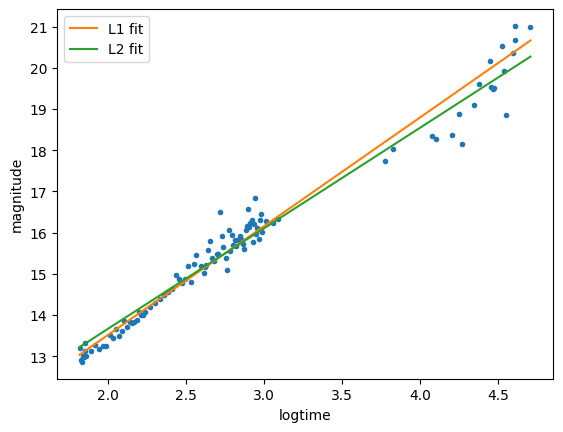

In [23]:
plot(x,y,".")
plt.plot(x,line(x,2.64,8.23), label="L1 fit")
plt.plot(x,line(x,2.44,8.78), label="L2 fit")
plt.legend()
pl.ylabel("magnitude")
pl.xlabel("logtime")

plt.show()

Figure 6: Plot for comparison between L1 and L2 fit.

# Plot all the solutions

Create a function that uses the parameters you input and plots a line. Add a legend that describes which line corresponds to what.


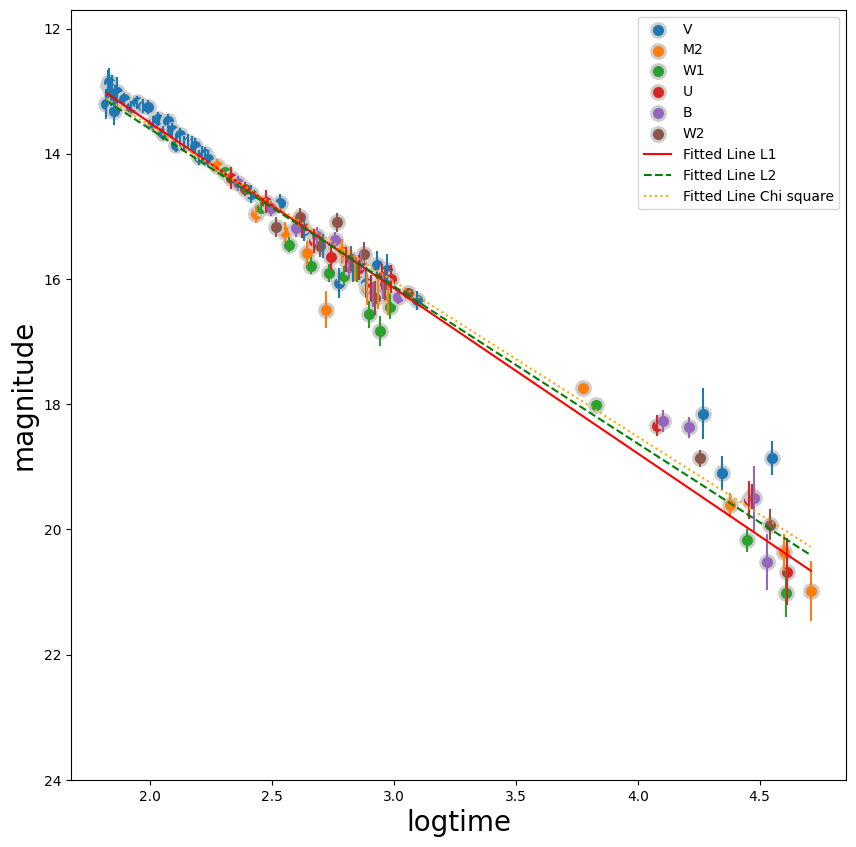

In [24]:
#create a figure container and an axis object inside of it


ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG_noupper["filter"].unique(): #set for unique filters
    pl.errorbar(grbAG_noupper.loc[grbAG_noupper["filter"] == f, "logtime"],
                grbAG_noupper.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG_noupper.loc[grbAG_noupper["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG_noupper["filter"].unique():
    pl.scatter(grbAG_noupper.loc[grbAG_noupper["filter"] == f, "logtime"],
               grbAG_noupper.loc[grbAG_noupper["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')

plt.plot()

# plot the upperlimits as arrows
nuplim = grbAG_noupper.mag.isna().sum()
for i in grbAG_noupper[grbAG_noupper.upperlimit == 1].index:
    pl.arrow(grbAG_noupper.loc[i].logtime,
             grbAG_noupper.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')
#minimize L1
plt.plot(x, line(x, slope, intercept), color='red', label="Fitted Line L1")
plt.plot(x, line(x, slopel2, interceptl2), color='green', label="Fitted Line L2", linestyle="--")
plt.plot(x, line(x, slopechi, interceptchi), color='orange', label="Fitted Line Chi square",linestyle=":")


# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("logtime", fontsize=20);

Figure 7: Same as Figure 1, but with linear regression models plotted. The models correspond to the best fit line to the data (excluding upper limits) calculated analytically by solving the normal equation, by solving the fit analysitcally with sklearn.LinearRegression(), and by minimizing the objective functions L1 and Chi squared. The models are indicated in the legend.

# HW part 1: redo the sklearn model with a train-test split of the data

- choose the train-test rations that you prefer
- get the score for the model when predicting on the train data and on the test data
- what can you say about the model by comparing the two scores?

In [25]:
from sklearn.model_selection import train_test_split

def line(x, intercept, slope):
    return slope * x + intercept

def l1(args,x,y):
  a,b = args
  return np.sum(np.absolute(y-line(x,a,b)))

def l2(args,x,y):
  a,b = args
  return np.sum((y-line(x,a,b))**2)

def Rsquare(args, x, y):
  """
  Calculate the R-squared (coefficient of determination) for a regression model.

  Parameters:
  y_true: 1D array-like, true observed values.
  y_pred: 1D array-like, predicted values.

  Returns:
  R-squared value.
  """
  a,b = args
  y_pred = line(x, a,b)
  residual_ss = np.sum((y-y_pred)**2)
  total_ss = np.sum((y-np.mean(y))**2)
  r_square = 1 - (residual_ss/total_ss)
  return r_square



In [26]:
x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size=0.25, random_state=42)

initialGuess = (10, 1)

l1solution_goodsplit = minimize(l1, initialGuess,
	args=(x_train, y_train))

l2solution_goodsplit = minimize(l2, initialGuess,
	args=(x_train, y_train))

print("best fit parameters from the minimization of the L1: " +
       " intercept {:.2f}, slope {:.2f}".format(*l1solution_goodsplit.x))

print("R square on training set: ", Rsquare(l1solution_goodsplit.x, x_train, y_train))
print("R square on test set: ", Rsquare(l1solution_goodsplit.x, x_test, y_test))


print("best fit parameters from the minimization of the L2: " +
       " intercept {:.2f}, slope {:.2f}".format(*l2solution_goodsplit.x))

print("R square on training set: ", Rsquare(l2solution_goodsplit.x, x_train, y_train))
print("R square on test set: ", Rsquare(l2solution_goodsplit.x, x_test, y_test))

best fit parameters from the minimization of the L1:  intercept 8.40, slope 2.57
R square on training set:  0.9705518468727363
R square on test set:  0.9719324378565825
best fit parameters from the minimization of the L2:  intercept 8.66, slope 2.48
R square on training set:  0.9716992501494643
R square on test set:  0.9695582517729407


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

In [28]:
lr1 = LinearRegression()

In [29]:
lr1.fit(X_train, Y_train)

LinearRegression()

In [30]:
lr1.score(X_train, Y_train)

0.9716992501494651

In [31]:
lr1.score(X_test, Y_test)

0.9695582551350493

I could not figure out the reg.score test as it had some errors with the dimension of the data, however the slides had R square test, in which the test score value closer to 1 means a good fit. In this case both L1 and L2 scores are close to one which means both are good fits however by slightest decimal point difference L2 stands out to be better than L1. Another point to note is that not only test score for train but test data should also be close to 1 to consider it as a good fit.

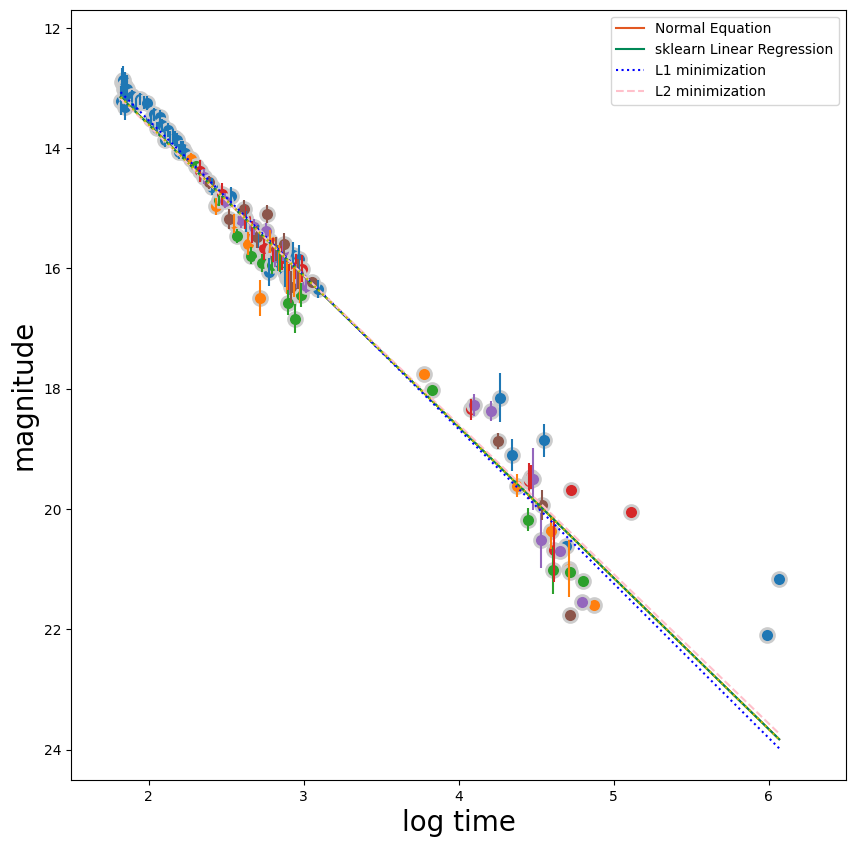

In [32]:
def plotline(pars, x, color='k', symbol='-', label='model',
             alpha=1, ax=ax):
    slope, intercept = pars
    y = line(intercept, slope, x)
    ax.plot(x, y, ls=symbol, c=color, label=label, alpha=alpha)


ax = pl.figure(figsize=(10,10)).add_subplot(111)

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               edgecolor='#cccccc', label=None)


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

#plotting models
#use Kelley colors for maximum readability
#https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
colors = ['C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379',
          '604E97', 'F6A600', 'B3446C',
          'DCD300', '882D17', '8DB600', '654522', 'E25822', '2B3D26',
          '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032', ]
#normal equation
plotline((lr.intercept_,lr.coef_[1]), grbAG.logtime,
         color='#'+colors[13],
         label="Normal Equation", ax=ax)
#sklearn
plotline((theta_best), grbAG.logtime,
         color='#'+colors[2], symbol='-',
         label="sklearn Linear Regression", ax=ax)
#minimize L1
plotline((l1solution_goodsplit.x), grbAG.logtime,
         symbol=':', color='blue',
         label="L1 minimization", ax=ax)

#minimize L2
plotline((l2solution_goodsplit.x), grbAG.logtime,
         symbol='--', color='pink',
         label="L2 minimization", ax=ax)


pl.legend()
# for linear regression
pl.plot(grbAG.logtime, lr.predict(np.c_[np.ones((len(grbAG), 1)), grbAG.logtime]), 'y:',label="Linear regression")

pl.ylim(24.5,11.7)
pl.xlim(1.5, 6.5)
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

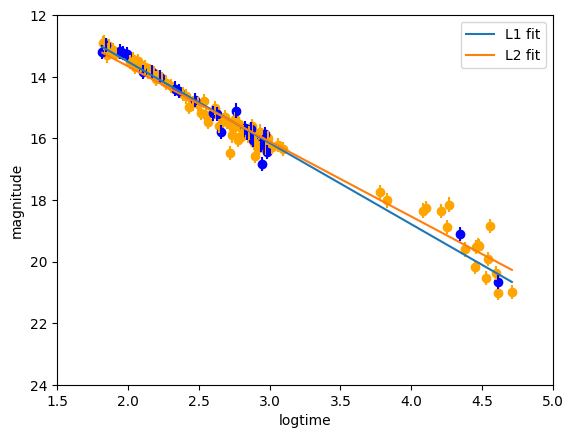

In [33]:
plt.scatter(x_train,y_train, color='orange')
plt.scatter(x_test,y_test, color='blue')
pl.errorbar(x_train,y_train, yerr=grbAG_noupper["magerr"][1], fmt='.', ms=0,
                color='orange', label=None)
pl.errorbar(x_test,y_test, yerr=grbAG_noupper["magerr"][1], fmt='.', ms=0,
                color='blue', label=None)
plt.plot(x,line(x,8.23,2.64), label="L1 fit")
plt.plot(x,line(x,8.78,2.44), label="L2 fit")
plt.legend()
pl.ylabel("magnitude")
pl.xlabel("logtime")
plt.xlim(1.5,5)
plt.ylim(24,12)
plt.show()

Figure 9 : Using the training and test set, fitting L1 and L2

# Now try a line to the data with MCMC

# HW part 2: write captions for each figure. The figures are produced by my code. The captions should state:
- what is plotted
- what is noticeable or interesting in the figure



In [34]:
!pip install emcee # install the emcee package that implements the _affine invariant MCMC_ method

In [35]:
import emcee #import the package

In [36]:
emcee

<module 'emcee' from '/usr/local/lib/python3.10/dist-packages/emcee/__init__.py'>

look at documentation: https://emcee.readthedocs.io/en/stable/

We are implementing Bayes theorem to find the best model parameters: $P(\theta | D) ~ P(D | \theta) * P(\theta)$ or _Posterior ~ Likelihood * Prior_

Since we are maximizing the likelihood, we work in log space because:
- the logarithm is a monotonic function of its argument (meaning where the argument gets bigger its log gets bigger, where it gets smaller its log gets smaller)
- the log is not defined for negative values (log(something < 0) is undefined) but this does not matter because the likelihood is a probability and probabilities are positive defined.



In [37]:
# LINE MODEL
def log_prior(theta):
  slope, intercept = theta
  if slope > 0 and intercept > 0:
    return 0
  #semi informative prior: i know light has to get fainter (mag get bigger)
  #i know i dont use negative mags
  return -np.inf


In [38]:
#log likelihood
def log_likelihood(theta, x, y, yerr):
  slope, intercept = theta
  #chi2 likelihood : (data-model)**2 / uncertainty **2
  return -np.sum(((y - line(intercept, slope, x))**2) / yerr**2)

In [39]:
#log posterior
def log_posterior(theta, x, y, yerr):
  lp = log_prior(theta)
  if not np.isfinite(lp):
    return -np.inf
  # posterior ~ likelihood * prior => log_posterior ~ log_likelihood + log_prior
  return lp + log_likelihood(theta, x, y, yerr)

In [40]:
#initial guess
ig = [1,10]

In [41]:
#initialize N walkers
nwalkers = 32
ndim = len(ig)

In [42]:
pos = np.array(ig) + 1e-4 * np.random.randn(nwalkers, ndim) #the starting point for each walker is a small perturbation of the initial guess

In [43]:
pos.shape

(32, 2)

In [44]:
# this sets up the model and assignes the hyperparameters
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y, s))

In [45]:
# this runs the MCMC for 5,000 steps
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [00:12<00:00, 407.91it/s]


In [46]:
# this extracts the ergodic markovian chains of positions in the feature space
samples = sampler.get_chain()

In [47]:
samples.shape

(5000, 32, 2)

In [48]:
# to get statistical properties of the chains I will concatenate the 32 chains. This works _iff_ the chains are independent
# note: the chains are _assumed_ to be independent
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

In [49]:
#the result of the mcmc (the best parameters and their uncertainties) are statistical properties of the chains
# I recommand the median and percentiles over the mean and standard deviation, since the chains need not be gaussian
mcmc = np.zeros((ndim, 3))
for i in range(ndim):
  mcmc[i] = np.percentile( flat_samples[:,i], [16, 50, 84])
mcmc

array([[8.55860627, 8.5988178 , 8.63940815],
       [2.46607894, 2.48047597, 2.49492203]])

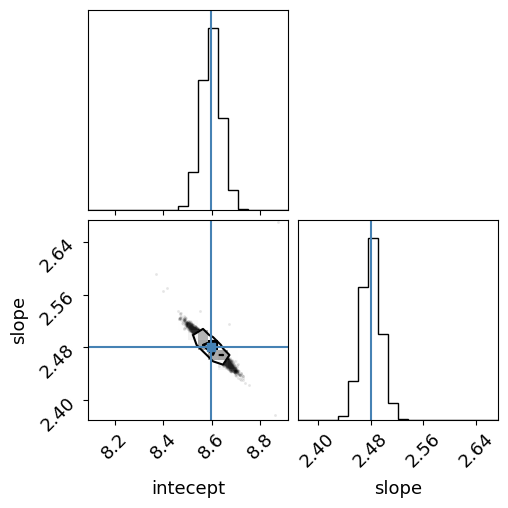

In [50]:
#plotting the likelihood space: the panels are 2D projections of the feature space and 1D marginalized probabilities for each parameters
!pip install corner
import corner
pl.rcParams["font.size"]= 13
fig = corner.corner(
    flat_samples, labels=["intecept", "slope"], truths=mcmc[:,1]);


Figure 10:
The histogram distribution (bell shaped) for slope and intercept show that the most likely values for slope and intercept lie between 2.45 to 2.57 and 8.52 to 8.56 respectively. The contour / scatter plot shows the correlation between the slope and intercept of a linear model (line).  
We performed Markov Chain Monte Carlo (MCMC) analysis to fit a linear model with two parameters (intercept and slope). After running the MCMC, the code generates a corner plot to visualize the posterior distribution of the model parameters and their uncertainties.

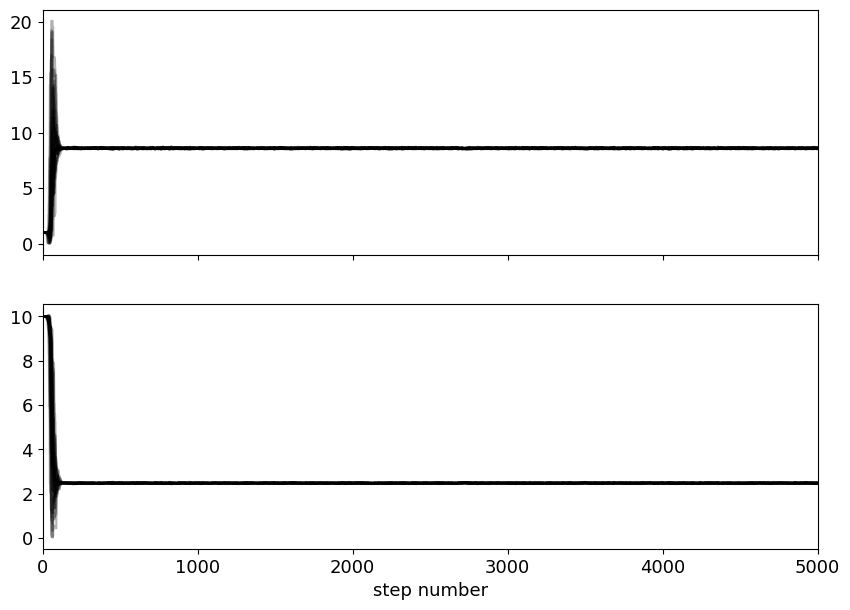

In [51]:
# the chains should be plotted as well. in the slides and in class I discuss what you should expect them to look like
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

Figure 11: The top figure is the intercept and the bottom figure is the slope one.
The x-axis represents the step number / iteration of the walker in the MCMC sampling pprocedure.The y-axis shows the value of the parameter at each step. All walkers are starting with random values however with the MCMC sampling iteration each walker converges to the approximate value of slope and intercept.



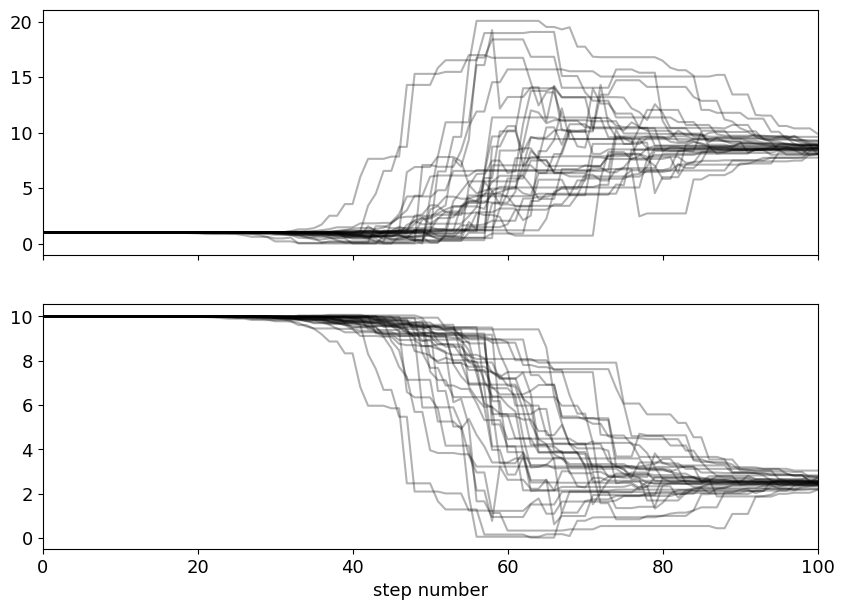

In [52]:
# zoom in: the beginning of the chain should be cut - this is the burn-in part of the chain
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, 100)#len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

Figure 12: These figures are the zoomed in version of the figure 11 with step numbers only 0 to 100. It shows that all the walkers start with the initial guess values 10, 1 for intercept and slope respectively. In the process of MCMC sampling the paramters evolve and converge slowly to towards their true value.
Th etop plot is for slope and the bottom one is for intercept.

In [53]:
# save the mcmc results for later
mcmc_line = mcmc
mcmc_line

array([[8.55860627, 8.5988178 , 8.63940815],
       [2.46607894, 2.48047597, 2.49492203]])

# HW part 3

# Now try a broken power law (BPL) model

A power la is not a good model for GRB afterglows. A broken power law has been known to be a better model and has several physical motivations. In this exercise you will fit a _broke power law_ to the data, which is a more complex and higher dimensional model than the simple line fit we did so far, with MCMC getting best values for the posterior, a complete characterization of the likelihood, and allowing model selection between the line and the power law.

> Here is some info that talks about the power law model and the phsyics of GRB, which you need not know to solve the assignment but you may be interested in.  A broken power law is a power law ($y ~ x^a$) where the power a changes at some point. This can be caused by the presence of two power law processes with different, for example, where one dominates at early time and the other at late times.


>> Here is some more info that explains why we observed the GRB afterglows as broken power laws.
>>Gamma-ray bursts (GRBs) are produced by the collapse of massive stars or the merger of compact objects like neutron stars. The energy of the collapse is highly energetic (Gamma rays) but the emission gets reprocessed as it leaves the system and looses energy becoming detectable in the optical wavelengths. This is called the "optical afterglow of the GRB".
>>The explosion resulting from the collapse generates a highly relativistic outflow of material that moves at a significant fraction of the speed of light.
>> The afterglow emission is primarily produced through synchrotron radiation, where charged particles spiral around magnetic field lines. The radiation produced by synchrotrone follows a power law with an index that depends on the density of the surrounding medium, the Lorentz factor of the outflow, and the magnetic field strength. As the radiation crosses different regions of the system that collapsed these factors change and the powerlaw index changes with them.

>>If the relativistic outflow is highly collimated (a jet) as the jet expands, its emission can be modeled as a power-law light curve, but  where the jet begins to decelerate and spread out the slope of the power law changes. This transition is known as the "jet break" and results in a broken power-law behavior.

>> Some GRBs exhibit late-time flares or additional energy injection from the central engine but we are not modeling this in this exercise.




_BPL model variables:_

$F = \mathrm{flux}$ - note: not magnitude this time! $mag ~ -2.5log10(Flux)$

$t =  \mathrm{time}$ - note: not log time

_BPL model parameters:_


$T_b =  \mathrm{Time~of~break}$

$a_1:  \mathrm{Early~slope}$

$a_2: \mathrm{Late~slope}$

$b:  \mathrm{nuisance~parameters}$

_BPL model_:

$F=\frac{F_0}{ \frac{t}{T_b}^{-a1} + \frac{t}{T_b}^{-a2}}$


$b - log_{10}((\frac{t}{T_b})^{-a1} + (\frac{t}{T_b})^{-a2}) $



In [54]:
t = grbAG[grbAG.upperlimit == 0].time.values

In [55]:
t.min(), t.max()

(66, 51257)

# HW part 3 task 1:
create the model `bpl()`, the `log_likelihood()`, `log_prior()` (choose what you want to set your prior to), and `log_posterior()`

In [56]:
def bpl (theta, x):
    """broken power law model
    Input:
      theta: (array like) 4 parameters vector, see equation
      T_b : time of break
      a1 : early slope
      a2 : late slope
      b : nuisance parameter
      x : (array like) independent variable
    Return:
      model predictions for each x (array like)
    """
    T_b, a1, a2,b = theta
    #flux = 10**b / ((x / T_b)**(-a1) + (x / T_b)**(-a2))
    mag = b - np.log10 ((x / T_b)**(-a1) + (x / T_b)**(-a2))
    return mag




In [57]:
def log_prior_bpl(theta):
  """
  Log-prior for the broken power law model.

  Parameters:
  - theta: (array-like) A 4-parameter vector [T_b, a1, a2, b]

  Returns:
  - Log-prior value
  """
  T_b, a1, a2,b =theta
  if T_b > 0 and  a1 > 0 and a2 > 0: #and -10000 < b < 10000 :
    # in astrophysical context time, and flux constant (b) cannot be zero and for our data specifically slope is non-negative too.
    return 0
  return -np.inf


In [58]:
def log_likelihood_bpl(theta, x, y, yerr):
    """Log-likelihood for the broken power law model.

    Parameters:
    - theta: (array-like) A 4-parameter vector [T_b, a1, a2, b]
    - x: (array-like) Independent variable
    - y: (array-like) Observed data
    - yerr: (array-like) Uncertainties in the observed data

    Returns:
    - Log-likelihood value
    """
    T_b, a1, a2,b =theta
    model = bpl(theta, x)
    chi_squared = ((y - model)**2 / yerr**2)
    return np.sum(chi_squared)


In [59]:
def log_posterior_bpl(theta,x,y,yerr):
  """Log-posterior for the broken power law model.

  Parameters:
  - theta: (array-like) A 4-parameter vector [T_b, a1, a2, b]
  - x: (array-like) Independent variable
  - y: (array-like) Observed data
  - yerr: (array-like) Uncertainties in the observed data

  Returns:
  - Log-posterior value
  """
  T_b, a1, a2,b =theta
  lp_bpl = log_prior_bpl(theta)
  if not np.isfinite(lp_bpl):
    return -np.inf

  return lp_bpl - log_likelihood_bpl(theta, x, y , yerr)


In [60]:
def negative_log_likelihood_bpl(theta, x, y, yerr):
  return log_likelihood_bpl(theta, x, y, yerr)

# HW part 3 task 2:
Find the initial starting point as a stochastic gradient descent minimization of the log likelihood

In [61]:
#ig = [0.2, 5, 1000, 20]
ig = [1000,5,20,0.2] # this guess worked for me although the minimizing below is giving a False success.
#what does the minimize function need to take as arguments?
soln = minimize(negative_log_likelihood_bpl ,ig, args=(t,y,s))
soln

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 217.46531456855303
        x: [ 2.736e+02  3.548e+00  2.146e+00  1.505e+01]
      nit: 79
      jac: [ 1.526e-05 -3.624e-05 -3.052e-05  4.005e-05]
 hess_inv: [[ 1.477e-03 -2.157e-03  5.454e-04 -2.955e-04]
            [-2.157e-03  3.228e-03 -8.951e-04  4.756e-04]
            [ 5.454e-04 -8.951e-04  3.279e-04 -1.552e-04]
            [-2.955e-04  4.756e-04 -1.552e-04  1.728e-04]]
     nfev: 699
     njev: 138

In [62]:
print("best fit parameters from the minimization of the chi squared: " +
       "T_b {:.2f}, a1 {:.2f}, a2 {:.2f}, b {:.2f}".format(*soln.x))

best fit parameters from the minimization of the chi squared: T_b 273.59, a1 3.55, a2 2.15, b 15.05


In [63]:
log_values = x
x_nolog = [10**x for x in log_values]
#x_nolog is basically t in our case

In [64]:
soln.x

array([273.5904614 ,   3.54796095,   2.1456929 ,  15.04718588])

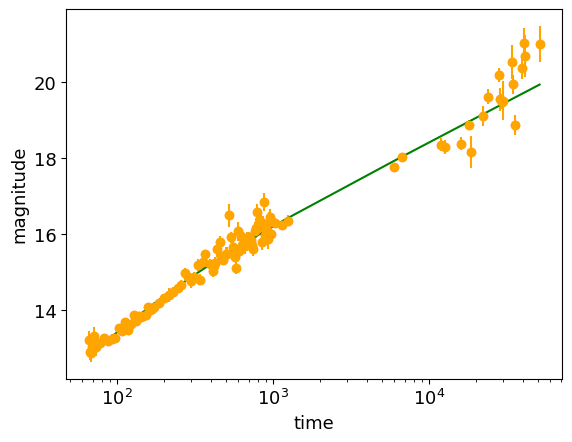

In [65]:
ig = soln.x # the initial guess for the MCMC
plt.scatter(t, y, color='pink')
# plot the model as it looks with the initial guess values
plt.errorbar(t, y, yerr=s, fmt="o", color='orange')
plt.plot(t, bpl(ig, t), color='green')
pl.xscale("log")
pl.xlabel("time")
pl.ylabel("magnitude")
pl.show()

Figure 13:
The plot for bpl model fitted to the actual data seems to be a pretty good fit.

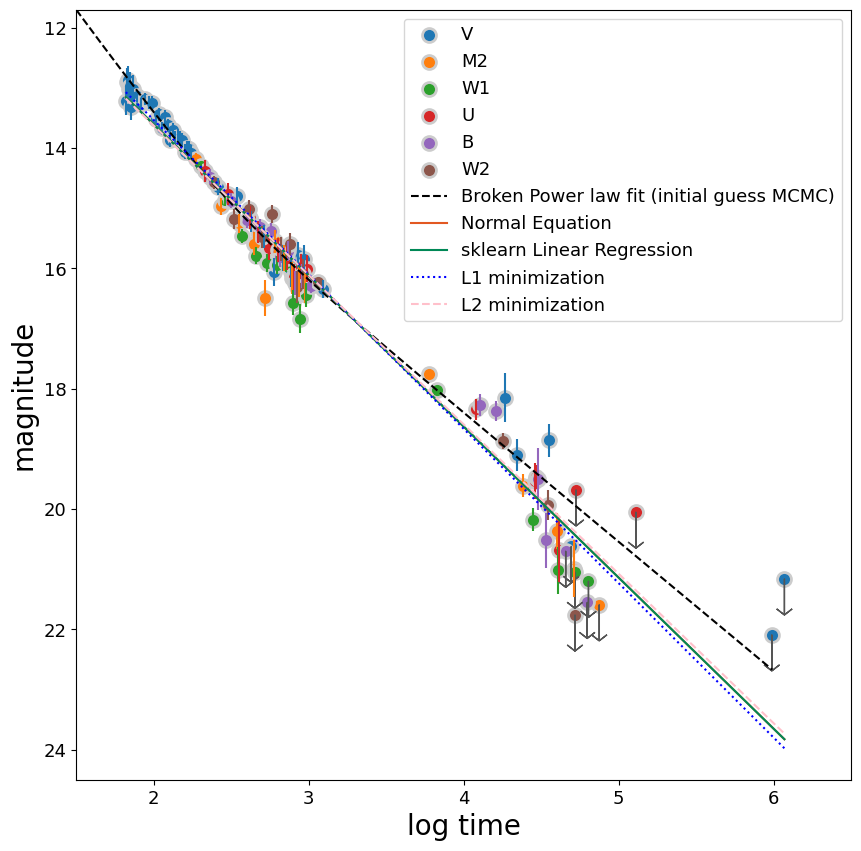

In [66]:
labels = ["intercept","slope"]
ax = plotlogtime(grbAG)
#plotting models
#use Kelley colors for maximum readability
#https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
colors = ['C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379',
          '604E97', 'F6A600', 'B3446C',
          'DCD300', '882D17', '8DB600', '654522', 'E25822', '2B3D26',
          '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032', ]

ax.plot(np.arange(1.5,6,0.01),
        bpl(ig, 10**np.arange(1.5,6,0.01)), ls="--", c="k",
        label="Broken Power law fit (initial guess MCMC)")
#normal equation
plotline((lr.intercept_,lr.coef_[1]), grbAG.logtime,
         color='#'+colors[13],
         label="Normal Equation", ax=ax)
#sklearn
plotline((theta_best), grbAG.logtime,
         color='#'+colors[2], symbol='-',
         label="sklearn Linear Regression", ax=ax)
#minimize L1
plotline((l1solution_goodsplit.x), grbAG.logtime,
         symbol=':', color='blue',
         label="L1 minimization", ax=ax)

#minimize L2
plotline((l2solution_goodsplit.x), grbAG.logtime,
         symbol='--', color='pink',
         label="L2 minimization", ax=ax)

pl.legend()

#with the LinearRegression object I can also do
#pl.plot(grbAG.logtime, lr.predict(np.c_[np.ones((len(grbAG), 1)), grbAG.logtime]), 'k-')

pl.ylim(24.5,11.7)
pl.xlim(1.5, 6.5)
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

Figure 14:
The plotted graph is the same as the previous one with an addition of the new model broken power law. The x axis is plotted in log time and y is the inverted magnitude axis. The bpl fit tho seems quite different from the rest of the fits is still a good fit.


# HW 3 task 3: optimize the model wit MCMC

- set the emcee hyperparameters
- run the chains
- extract the statistical properties of the chain as the best fit values
- plot the model
- plot the marginalized posteriors of the model parameters

In [67]:
# set the emcee hyperparameters
nwalkers, ndim = 30, len(ig)
pos = np.array(ig) + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior_bpl, args=(t, y, s))

In [68]:
# run the model
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [00:25<00:00, 197.68it/s]


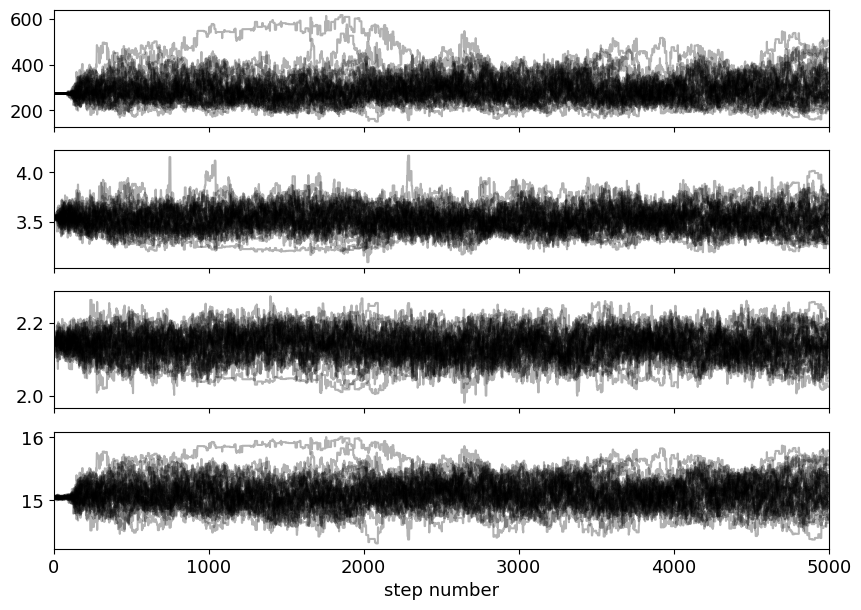

In [69]:
#plot the chains
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()


for i in range(ndim):
  ax = axes[i]
  ax.plot(samples[:, :, i], "k", alpha=0.3)
  ax.set_xlim(0, len(samples))
  ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
axes[-1].set_xlabel("step number");

Figure 15:
This plot shows the parameters value for each walker converging for a single value close to the initial guess. Each walker walks 5000 steps. The plots seem to be very noisy and it is difficult to see the walkers converge in this case.
The order of the plots is : T_b, a1, a2 , b.

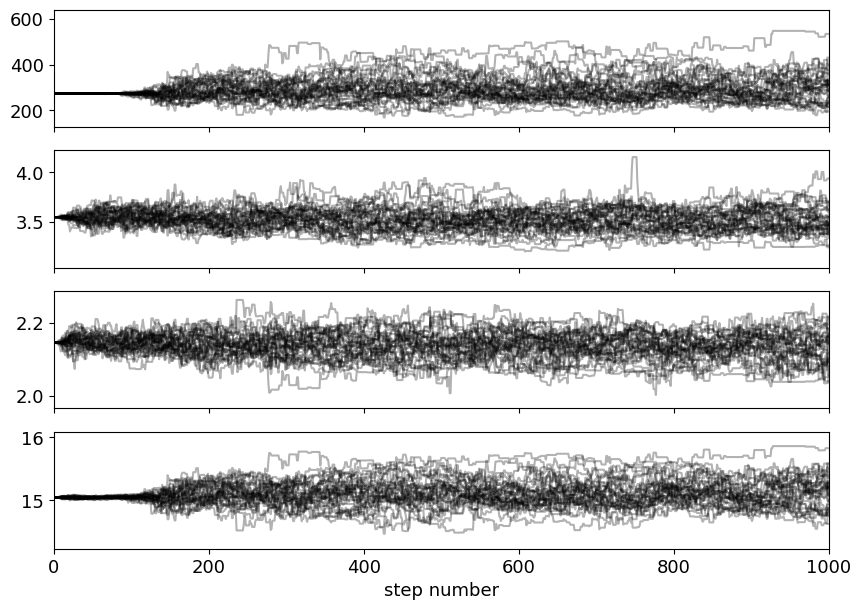

In [70]:
#plot the chains
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()


for i in range(ndim):
  ax = axes[i]
  ax.plot(samples[:, :, i], "k", alpha=0.3)
  ax.set_xlim(0, 1000)
  ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
axes[-1].set_xlabel("step number");

Figure 16: Plotting the same graph as 15 with just 1000 steps to zoom into the walkers path however no convergence takes place here.

# get the 16th, 50, and 84th percentiles of the model parameters

In [71]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
mcmc = np.zeros((ndim, 3))
for i in range(ndim):
  mcmc[i] = np.percentile( flat_samples[:,i], [16, 50, 84])
mcmc

array([[238.0460779 , 284.8120378 , 352.8341192 ],
       [  3.40534391,   3.52155721,   3.64438604],
       [  2.09800117,   2.13847082,   2.17688679],
       [ 14.8763441 ,  15.09535675,  15.34867615]])

T_b = 273.59, a1 = 3.55, a2 = 2.15, b = 15.05
* almost same as the initial guesses.

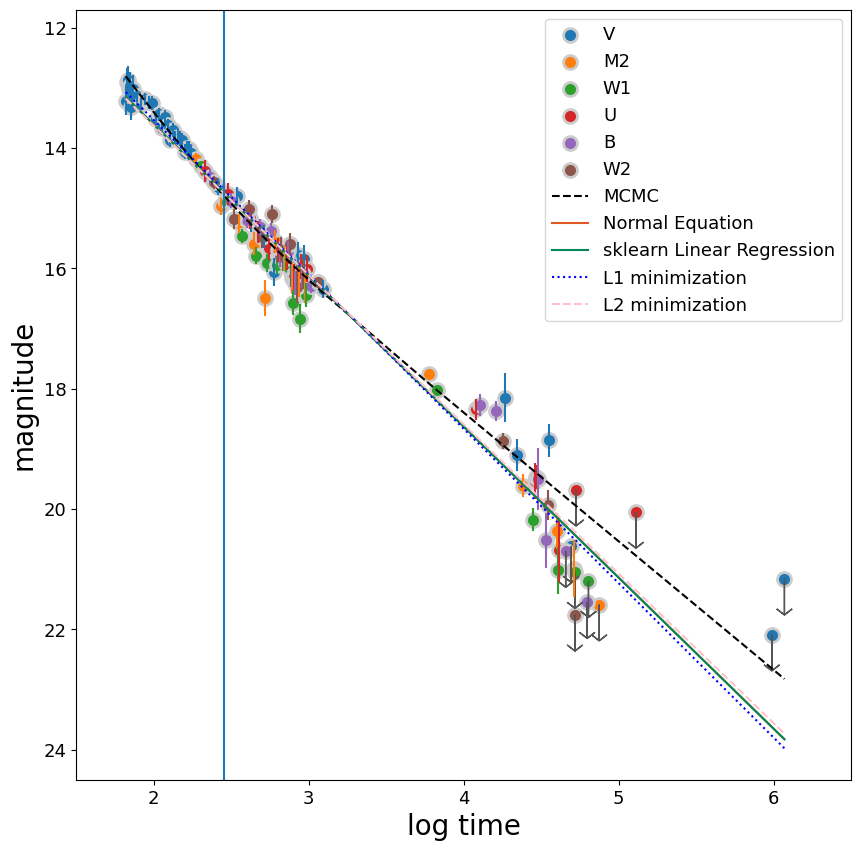

In [72]:
#plot the model
ax = plotlogtime(grbAG)

#plotting models
#use Kelley colors for maximum readability
#https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
colors = ['C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379',
          '604E97', 'F6A600', 'B3446C',
          'DCD300', '882D17', '8DB600', '654522', 'E25822', '2B3D26',
          '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032', ]

ax.plot(grbAG.logtime.values, bpl(mcmc[:,1],
                            10**grbAG.logtime.values), ls="--", c="k", label="MCMC")
#normal equation
plotline((lr.intercept_,lr.coef_[1]), grbAG.logtime,
         color='#'+colors[13],
         label="Normal Equation", ax=ax)
#sklearn
plotline((theta_best), grbAG.logtime,
         color='#'+colors[2], symbol='-',
         label="sklearn Linear Regression", ax=ax)
#minimize L1
plotline((l1solution_goodsplit.x), grbAG.logtime,
         symbol=':', color='blue',
         label="L1 minimization", ax=ax)

#minimize L2
plotline((l2solution_goodsplit.x), grbAG.logtime,
         symbol='--', color='pink',
         label="L2 minimization", ax=ax)

pl.legend()

#with the LinearRegression object I can also do
#pl.plot(grbAG.logtime, lr.predict(np.c_[np.ones((len(grbAG), 1)), grbAG.logtime]), 'k-')
pl.axvline(np.log10(mcmc[0,1]))
pl.ylim(24.5,11.7)
pl.xlim(1.5, 6.5)
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

Figure 17: This plot as seen many times before has all the fits for linear model and the bpl alongwith the MCMC sampled paramters. The blue vertical line corresponds to the break time at the point where the power law breaks.

Because my parameter order is different so for this the plot is breaking at mcmc[0,1]

In [73]:
np.log10(mcmc[0,1])

2.4545583411493253

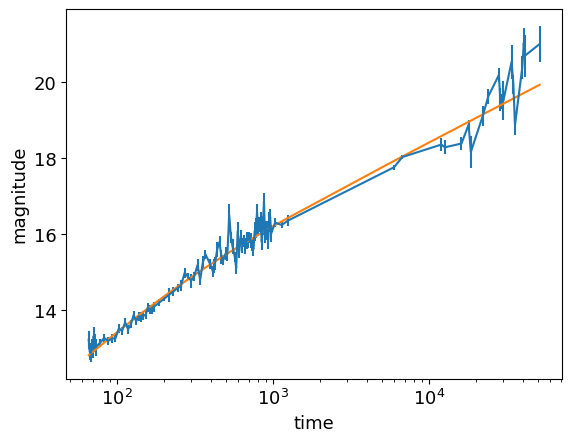

In [74]:
ig = mcmc[:,1] # the initial guess for the MCMC

# plot the model as it looks with the initial guess values
pl.errorbar(t, y, yerr=s)
pl.plot(t, bpl(ig, t))
pl.xscale("log")
pl.xlabel("time")
pl.ylabel("magnitude")
pl.show()

Figure 18: Plotting to check the mcmc fit with the actual data

## plot the marginalized posterior distributions of the parameters

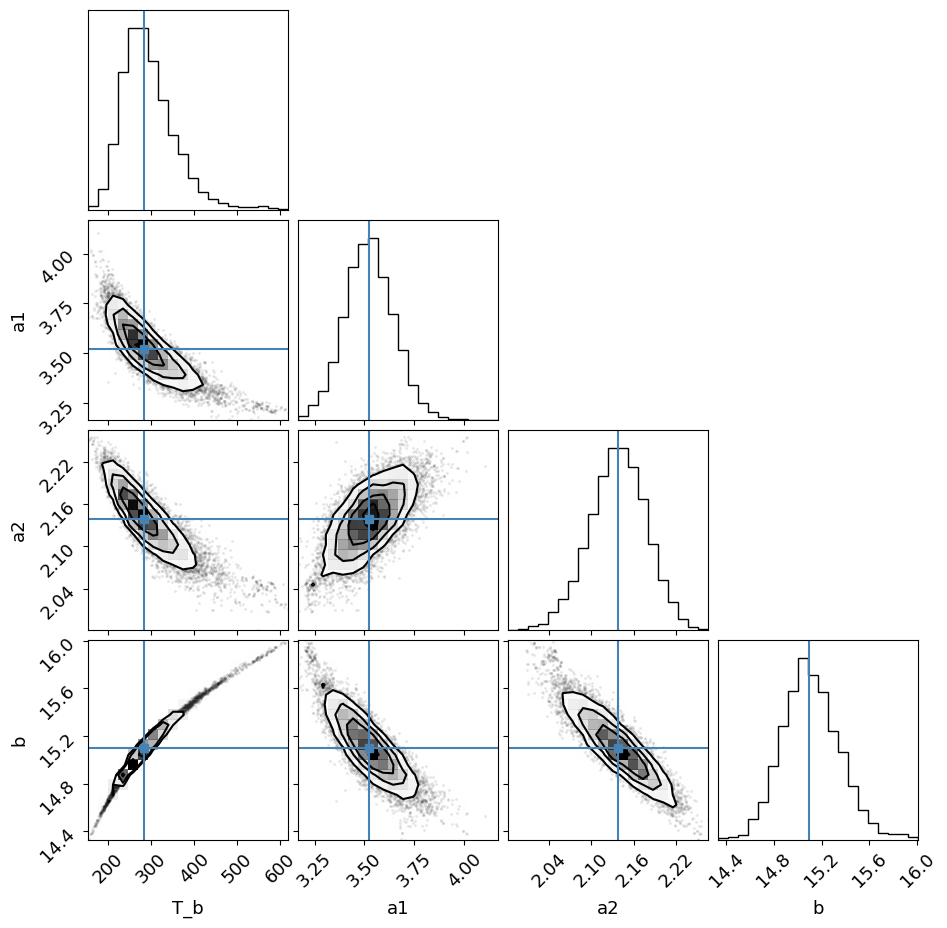

In [75]:

pl.rcParams["font.size"]= 13
fig = corner.corner(
    flat_samples, labels=["T_b", "a1", "a2", "b"], truths=mcmc[:,1]);



Figure 19: The corner plots are representing the ocrrelation aomng the 4 parameters defined by the bpl and posterior distributions. the blue dots and the lines show the true values (mcmc sampler). The contours and scatter plots
for each paramters describe the the covariance matrix and how do they relate with another. All the parameters are correlated linearly, as shown in the figure.
The histogram is shaped as gaussian, with mean values lying close in the range of the ctual values of the parameters.

# HW part 4: Compare the line (as obtained by the MCMC) and broken power law models. For this part of the assignment use the slides in part 2.2 of the current slide deck (slide column 8) https://slides.com/federicabianco/dsps_6#/8. in particular:

- Print the loglikelihood of each model (you can use the log_likelihood function you had written for each)
https://slides.com/federicabianco/dsps_6#/8/1 through https://slides.com/federicabianco/dsps_6#/8/3

- implement the caluculation of the AIC (https://slides.com/federicabianco/dsps_6#/8/4 through 6)
- and BIC (https://slides.com/federicabianco/dsps_6#/8/7)



In [76]:
print("The likelihood for line model is : {:.2f}" .format(log_likelihood(mcmc_line[:,1], x, y, s)))#control the decimal digits!

The likelihood for line model is : -317.42


In [77]:
print("The likelihood for bpl model is : {:.2f}" .format(log_likelihood_bpl(mcmc[:,1], t, y, s)))

The likelihood for bpl model is : 217.49


## Implement the likelihood ration test printing out the likelihood ration statistics

The likelihood-ratio test assesses the goodness of fit of two competing _nested_ statistical models based on the values of the likelihood $L$ where $M1$ is the restricted model (the parameter space is smaller, hence restricted), nested inside $M2$, the full model (the more complex one).

$ \lambda_\mathrm{LR}=-2\ln {\frac {L(M1(\theta_\mathrm{restricted}))}{L(M2(\theta_\mathrm{full}))}}$

This statistics is expexted to be $\chi2$ distributed following a $ch2$ distribution with d.o.f=difference in size of the parameter space in the two models (number of parameters in bpl model - number of parameters in line model).


In [78]:

from scipy.stats.distributions import chi2
def like_ratio_statistics(Ls,Lc,dof):
  lambda_lr = -2 * np.log(Lc/Ls)
  p = chi2.sf(lambda_lr, dof)
  return p

In [79]:
dof = len(mcmc[:,1]) - len(mcmc_line[:,1])
dof

2

In [80]:
Lc = log_likelihood_bpl(mcmc[:,1],t,y,s)
Ls = -log_likelihood(mcmc_line[:,1],x,y,s)
Lc, Ls

(217.49154972719586, 317.4209195177975)

In [81]:
like_ratio_statistics(Ls,Lc,dof)

0.6851834153136255

I set the threshold value α to 0.05, p- value of 0.685 signifies that 68% chance is that null hypothesis cannot be rejected, In our case null hypothesis is that the simpler model that is a linear fit is the best fit. However, we still can't say for sure if alternate hypothesis is rejected for sure.


## Calculate the AIC and BIC: Aikiki Information Criterion and Bayesian Information Criterion for the comparison of the same two models.


In [82]:
def aic(x, l, k):
  return  -2 / len(x) * (l - k)


def bic(x, l, k):
  return  -2 * l + np.log(len(x)) * k


In [83]:
print("AIC line {0:.2f} - AIC bpl {1:.2f}".format(aic(x, -log_likelihood(mcmc_line[:,1], x, y, s), 2),
                                      aic(x, log_likelihood_bpl(mcmc[:,1], t, y, s), 4)))

print("BIC line {0:.2f} - BIC bpl {0:.2f}".format(bic(x, log_likelihood(mcmc_line[:,1], x, y, s), 2),
                                      bic(x, log_likelihood_bpl(mcmc[:,1], t, y, s), 4)))

AIC line -5.84 - AIC bpl -3.95
BIC line 644.21 - BIC bpl 644.21


Lower the value for aic , bic for a certain model, more likely it is to be the best fit, so using bic and aic the lowest score is for the line model, bic scores are same though. this implies line model is the best fit, which is i agreement with the p value of no rejection of null hypothesis.

* I tried this part using sarah's definition of aic and bic seems like the scores differ but the result is interpreted in the same way.

In [84]:
def aic(log_likelihood, k, N):
    """
    Calculate the Akaike Information Criterion (AIC) using an external log-likelihood function.

    Parameters:
    log_likelihood : The log-likelihood of the model.
    k : The number of model parameters.
    N : The number of observations.

    Returns:
    float: The AIC value of the model
    """
    return -2/N * np.log(np.abs(log_likelihood)) + 2/N * k

In [85]:
def bic(log_likelihood, k, N):
    """
    Calculate the Bayesian Information Criterion (BIC) using an external log-likelihood function.

    Parameters:
    log_likelihood : The log-likelihood of the model.
    k : The number of model parameters.
    N : The number of observations.

    Returns:
    float: The BIC value.
    """
    return -2 * np.log(np.abs(log_likelihood)) + np.log(N) * k


In [86]:
# Calculate AIC and BIC for the "line" model
aic_line = aic(log_likelihood(mcmc_line[:, 1], x, y, s), 2, len(x))
bic_line = bic(log_likelihood(mcmc_line[:, 1], x, y, s), 2, len(x))

# Calculate AIC and BIC for the "bpl" model
aic_bpl = aic(log_likelihood_bpl(mcmc[:, 1], t, y, s), 4, len(t))
bic_bpl = bic(log_likelihood_bpl(mcmc[:, 1], t, y, s), 4, len(t))

print("AIC line: {0:.2f} - AIC bpl: {1:.2f}".format(aic_line, aic_bpl))
print("BIC line: {0:.2f} - BIC bpl: {1:.2f}".format(bic_line, bic_bpl))

AIC line: -0.07 - AIC bpl: -0.03
BIC line: -2.16 - BIC bpl: 7.96


aic and bic value for line model is less so the line model is the best fit.